# Comparison of K1 v.s. K2

In [1]:
import torch 

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas import DataFrame

from tqdm import tqdm 

from matplotlib.pyplot import figure
import matplotlib as mpl

In [2]:
import sys 
sys.path.append('..')

In [10]:
def read_state_freq(path, N):
    state_freq = np.zeros(N)
    state_nonstop_freq = np.zeros(N)
    with open(path) as fd:
        lines = fd.readlines()
        for li, l in enumerate(lines):
            if(li % 3 == 0):
                l = l.split()
                state_id = int(l[1])
                state_freq[state_id] = int(l[3])
                state_nonstop_freq[state_id] = int(l[5])
                
    state_idx_sort = state_freq.argsort()[::-1]
    state_stop_freq = state_freq - state_nonstop_freq
    return state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort

def vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, N):
    figure(figsize=(6, 4), dpi=200)
    # fig, ax = plt.subplots()
    state_freq_ = state_freq[state_idx_sort]
    state_stop_freq_ = state_stop_freq[state_idx_sort]
    state_nonstop_freq_ = state_nonstop_freq[state_idx_sort]

    state_stop_freq_vis = np.log(state_freq_) * (state_stop_freq_ / state_freq_)
    state_nonstop_freq_vis = np.log(state_freq_) * (state_nonstop_freq_ / state_freq_)

    fig_stop = plt.bar(x=np.arange(N), height=state_stop_freq_vis, color='lightskyblue')
    fig_nonstop = plt.bar(x=np.arange(N), height=state_nonstop_freq_vis, bottom=state_stop_freq_vis, color='tab:blue')

    plt.legend((fig_stop, fig_nonstop), 
               ('Stopwords', 'Non-stopwords'), 
               fontsize=15)
    # plt.yscale('log')
    plt.tick_params(axis='both', which='both', left=False, labelsize=15, labelleft=False) 
    plt.xlim([0, N])
    return

# 500 States

## Top K only

/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


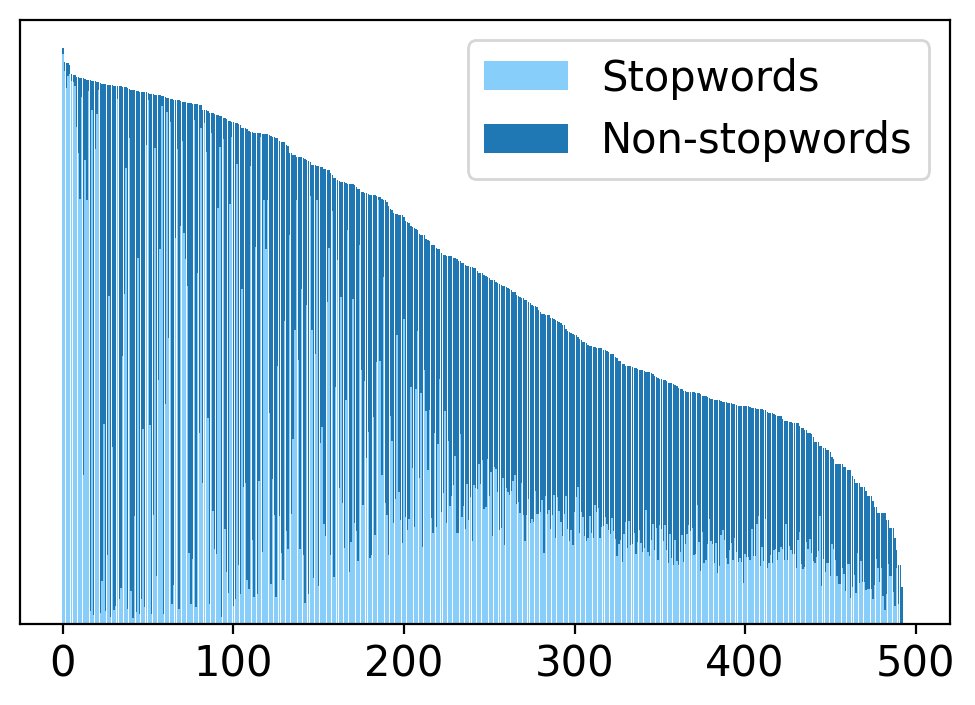

In [4]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.1.3.0/bertnet_dev_epoch_16_s2w.txt', 500)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 500)

## RDP

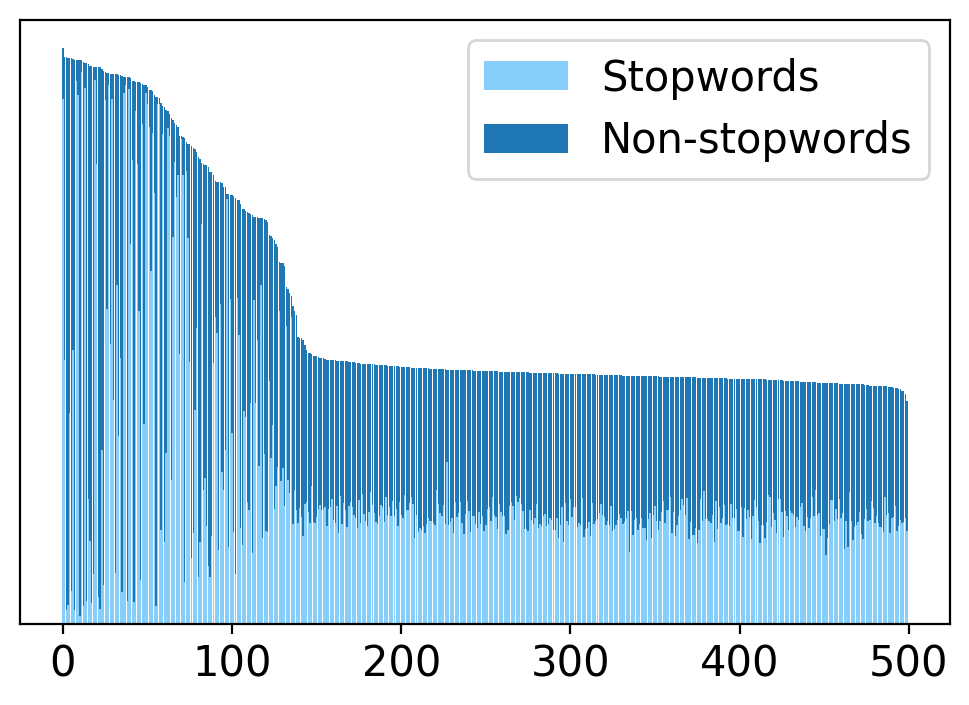

In [5]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.1.0.0/bertnet_dev_epoch_16_s2w.txt', 500)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 500)

# 2000 States

## Top K only

/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/home/s1946695/miniconda3/envs/_dl_py36_dev/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


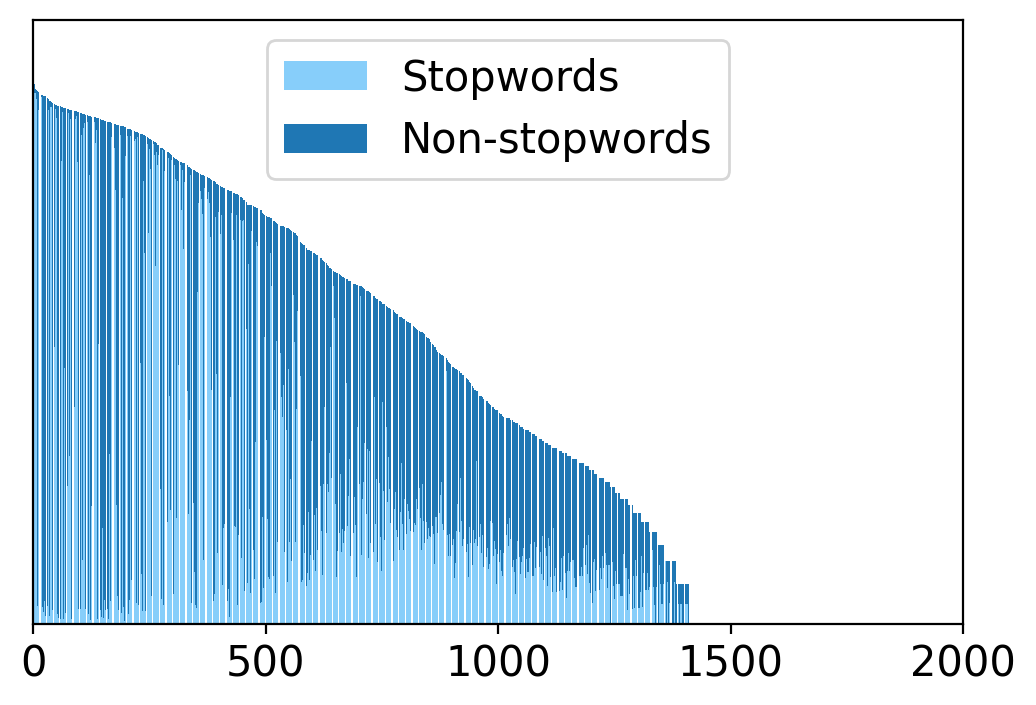

In [11]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.2.0.0/bertnet_dev_epoch_16_s2w.txt', 2000)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 2000)

## RDP K1 = 99, K2 = 1

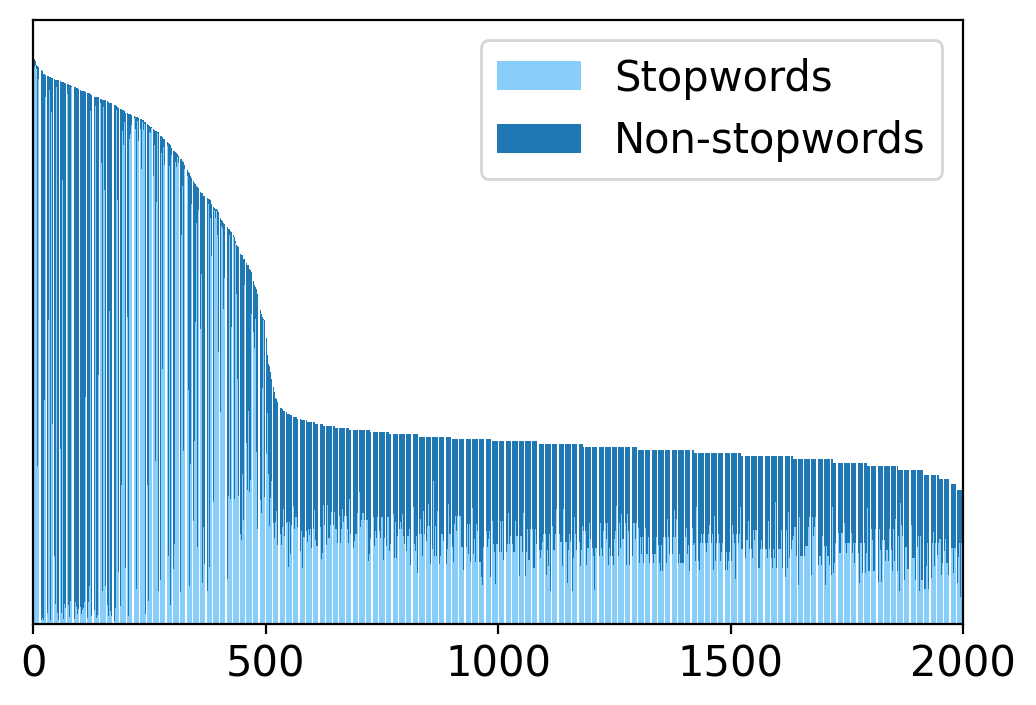

In [12]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.2.1.0/bertnet_dev_epoch_16_s2w.txt', 2000)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 2000)

## RDP K1 = 50, K2 = 50

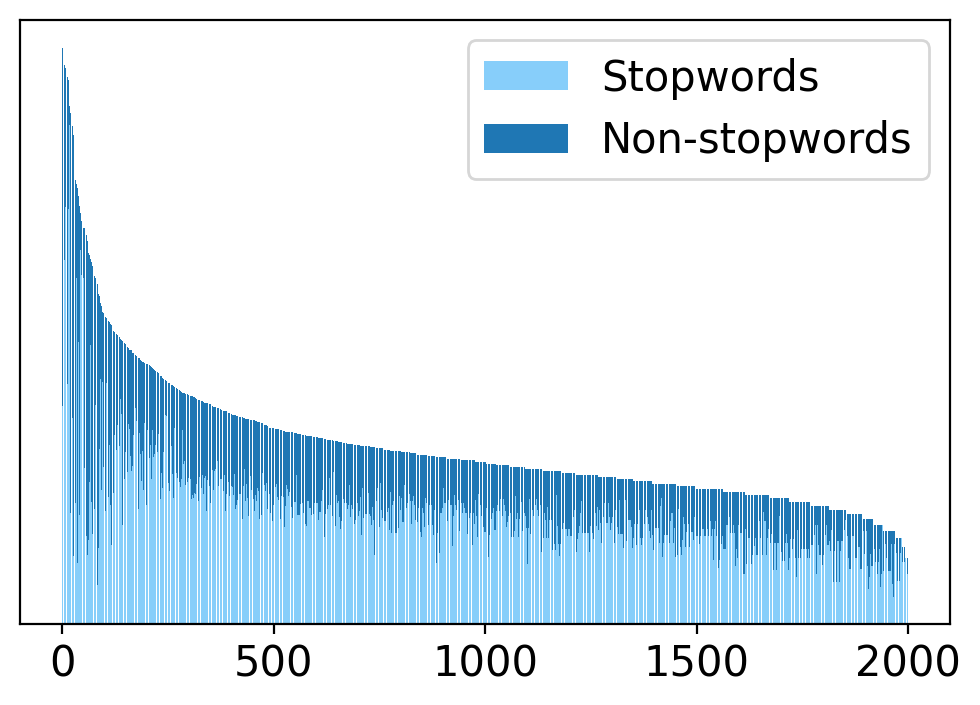

In [8]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.2.2.0/bertnet_dev_epoch_16_s2w.txt', 2000)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 2000)

## RDP K1 = 10, K2 = 90

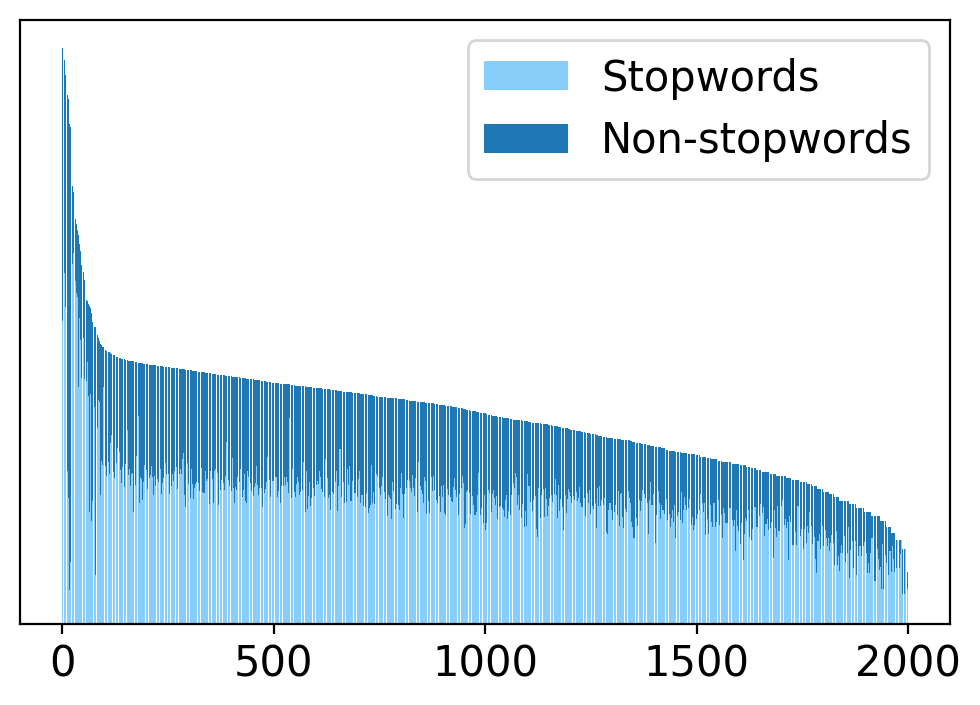

In [9]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.2.3.0/bertnet_dev_epoch_16_s2w.txt', 2000)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 2000)